Name: Aditi Atul Kakade
Roll No.: 21102B0061
Branch: CMPN-B
Batch: 4

Classification Metrics
Accuracy: 0.97
Precision: 0.98
Recall: 0.94
F1 Score: 0.96
ROC AUC: 1.00

Regression Metrics
Mean Squared Error: 2560410737.09
R-Squared: 0.81


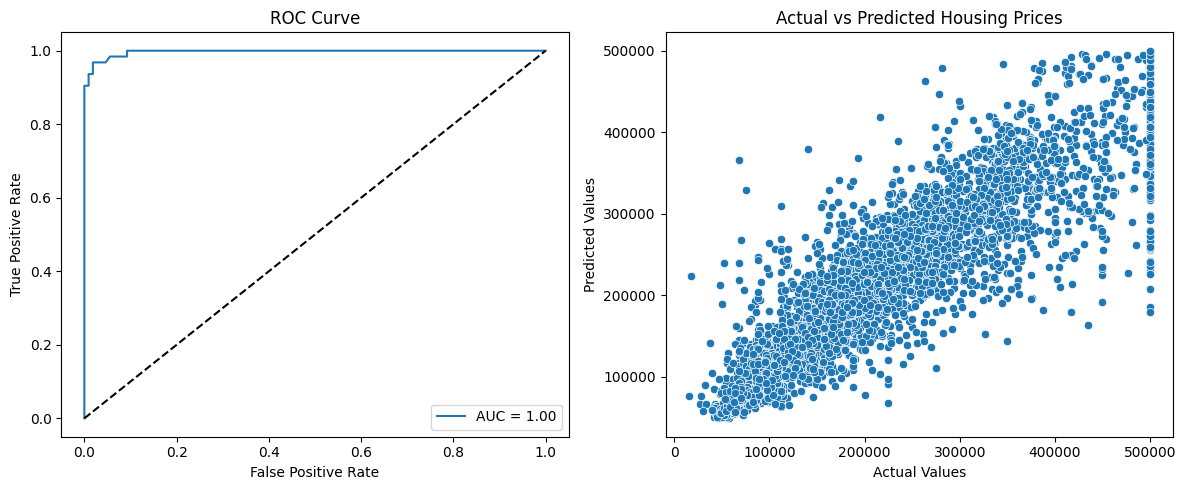

In [ ]:


import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare datasets
cancer_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", header=None)
X_cancer = cancer_data.iloc[:, 2:]
y_cancer = cancer_data.iloc[:, 1].apply(lambda x: 1 if x == 'M' else 0)
housing_data = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
X_housing = housing_data.drop(columns=['median_house_value'])
y_housing = housing_data['median_house_value']

# Train-test split
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.3, random_state=42)
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(X_housing, y_housing, test_size=0.3, random_state=42)

# Initialize, train, and predict with Random Forest models
rf_classifier = RandomForestClassifier(random_state=42)
rf_regressor = RandomForestRegressor(random_state=42)
rf_classifier.fit(X_train_cancer, y_train_cancer)
rf_regressor.fit(X_train_housing, y_train_housing)
y_pred_cancer = rf_classifier.predict(X_test_cancer)
y_pred_proba_cancer = rf_classifier.predict_proba(X_test_cancer)[:, 1]
y_pred_housing = rf_regressor.predict(X_test_housing)

# Classification Metrics
print("Classification Metrics")
print(f"Accuracy: {accuracy_score(y_test_cancer, y_pred_cancer):.2f}")
print(f"Precision: {precision_score(y_test_cancer, y_pred_cancer):.2f}")
print(f"Recall: {recall_score(y_test_cancer, y_pred_cancer):.2f}")
print(f"F1 Score: {f1_score(y_test_cancer, y_pred_cancer):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test_cancer, y_pred_proba_cancer):.2f}")

# Regression Metrics
print("\nRegression Metrics")
print(f"Mean Squared Error: {mean_squared_error(y_test_housing, y_pred_housing):.2f}")
print(f"R-Squared: {r2_score(y_test_housing, y_pred_housing):.2f}")

# Plot ROC curve and Actual vs Predicted
fpr, tpr, _ = roc_curve(y_test_cancer, y_pred_proba_cancer)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test_cancer, y_pred_proba_cancer):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_housing, y=y_pred_housing)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Housing Prices')

plt.tight_layout()
plt.show()
